In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
import numpy as np
from matplotlib.lines import Line2D

In [3]:
import matplotlib.font_manager as fm
print(sorted(set(f.name for f in fm.fontManager.ttflist if "Nimbus" in f.name)))

['NimbusSanL', 'NimbusSanLCon']


In [4]:
# --- Font Configuration for Helvetica ---
mpl.rcParams['font.family'] = 'NimbusSanL'

In [65]:
def plot_gene_block(gene_name: str, measurements: np.ndarray, colormap: str = 'vlag', incluster=True, output_filename: str = None):
    """
    Generates a 1x2 gene visualization block with a central gene name overlay.

    The color of each block (Left and Right) corresponds to the value in the 
    'measurements' array, mapped via the specified colormap.

    Args:
        gene_name (str): The name of the gene (e.g., 'MAP4K1').
        measurements (np.ndarray): A 1D NumPy array of two numerical values, 
                                   representing the measurement for each block.
                                   Structure: [Left_Block, Right_Block]
        colormap (str): The matplotlib colormap to use (e.g., 'Reds', 'viridis', etc.).
    """
    # 1. Setup the figure and axis
    # Adjusted figsize for a 1x2 horizontal look
    fig, ax = plt.subplots(figsize=(2, 1)) 
    
    # Define a consistent value range for the colormap (0.0 to 1.0) 
    vmin, vmax = -1.0, 1.0

    # Reshape the 1D array (2 elements) into a 1x2 2D array for imshow.
    data_2d = measurements.reshape(1, 2)

    # 2. Plot the 1x2 data using imshow (creates the colored blocks)
    # extent=[xmin, xmax, ymin, ymax]. x runs from 0 to 2, y runs from 0 to 1.
    img = ax.imshow(data_2d, cmap=colormap, vmin=vmin, vmax=vmax, 
                    interpolation='nearest', extent=[0, 2, 0, 1]) 

    # 3. Apply plot aesthetics and add black line borders/separators
    ax.set_xticks([]) # Remove x ticks
    ax.set_yticks([]) # Remove y ticks

    if incluster:
        line_style = '-'
        line_width = 1.5
        font_weight = 'bold'
        custom_dashes = [2,0]
    else:
        line_style = '--'
        line_width = 1.5
        font_weight = 'normal'
        custom_dashes = [2,4]
    
    # Set all spines (outer borders) to be visible and black
    for spine in ax.spines.values():
        spine.set_linewidth(line_width)
        spine.set_linestyle(line_style)
        spine.set_edgecolor('black')
        spine.set_visible(True) # Ensure all four borders are visible
        spine.set_linestyle((0, custom_dashes))
    
    # Add a black vertical line to separate the two blocks (at x=1.0)
    
    line = Line2D([1.0, 1.0], [0, 1], color='black', linewidth=line_width, zorder=1)
    line.set_linestyle((0, custom_dashes)) # Apply custom dashes
    ax.add_line(line)

    # Ensure the aspect ratio and limits are correct
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1) # Y-limit is now 1 for the 1x2 shape

    # 4. Draw the central white box (Rectangle patch)
    # The center of the 1x2 grid is now at (1.0, 0.5)
    box_width = 1.2
    box_height = 0.5
    center_x = 1.0
    center_y = 0.5
    
    # Create the white rectangle
    rect = patches.Rectangle(
        (center_x - box_width/2, center_y - box_height/2),  # (x, y) starting point (bottom-left)
        box_width, 
        box_height,
        linewidth=line_width,
        linestyle=line_style,
        edgecolor='black', # Border color
        facecolor='white', # Fill color
        zorder=2 # Ensure the box is above the colored blocks
    )
    rect.set_linestyle((0, custom_dashes)) 
    ax.add_patch(rect)

    # 5. Add the gene name text
    #mpl.rcParams['font.weight'] = 'bold'
    ax.text(
        center_x, center_y, # Position at the center of the plot (1.0, 0.5)
        gene_name,
        color='black',
        fontsize=13,
        fontweight=font_weight,
        ha='center', # Horizontal alignment: Center
        va='center', # Vertical alignment: Center
        zorder=3 # Ensure text is above the white box
    )

    # 6. Show the plot (or save it)
    if output_filename:
        # Save the figure with tight bounding box and high resolution (300 DPI)
        plt.savefig(output_filename, bbox_inches='tight', dpi=300)
        plt.close(fig) # Close the figure to free memory
        print(f"Figure successfully saved to {output_filename}")
    else:
        plt.show()

ValueError: 'vlag' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Grays_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'berlin', 'berlin_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_grey_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gist_yerg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'grey_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'managua', 'managua_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'vanimo', 'vanimo_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

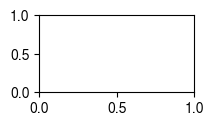

In [67]:
gene = "CEPBBP"

# Define the data for the two blocks (0.0 is minimum, 1.0 is maximum color intensity)
# The order is: [Left_Block, Right_Block]
sample_measurements = np.array([-0.4, 0.9]) 

# Generate the plot
plot_gene_block(gene, sample_measurements, colormap='vlag', incluster=True)#, output_filename='./results/for_TCR_schematics/'+gene+'.png')